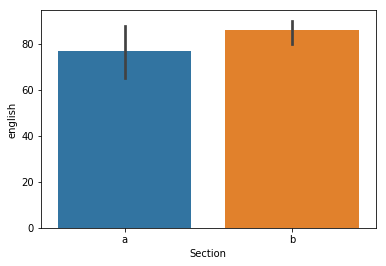

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy import mean


class  First_Page:
        

    def __init__(self,master): #this initial function will run on its own on starting the program
        
        global frame # made the frame global to use it in different functions
       
        frame=Frame(master) #created a master frame to compile all the GUI texts,inputs,buttons
        frame.pack() # packing of the variable to display it in GUI
        
        #button to call the tkinter openfile function for reading the csv file
        self.open_file_btn = Button(frame , text = "OPEN CSV FILE", command = self.open,fg = 'black',bg = 'white', relief = RAISED,font=("Comic Sans MS", 20))
        self.open_file_btn.pack()
        
        def retrieve_input():# retieving the data into a variable from the GUI 
            global inputValue
            inputValue=textBox.get("1.0","end-1c") #get function stores the data of the text box into the variable "1.0" reads the first character and "end-1c" for the last character
            
            
        label_4=Label(frame,text="Enter Value for Duplication Check(RollNo)") #label function displays text onto the display window
        #entry_4=Entry(frame)
        label_4.pack()
        #entry_4.pack()
        textBox=Text(frame,height=2,width=10) #to create a textbox inside the frame with given height and width
        textBox.pack()

        buttonCommit=Button(frame,height=1,width=10,text="Commit",command=lambda:retrieve_input()) #"commit text will be displayed on the button and lambda restricts the function from doing anything prior its call

        buttonCommit.pack()


       
        
        self.printButton1 =Button(frame,text="Duplication & append",command=self.work) # button to call the work function which checks duplication and appends data if there is a new value
        self.printButton1.pack()   
            
        #storing name of the section    
        def retrieve_input1():
            global inputValue1
            inputValue1=textBox1.get("1.0","end-1c")
            
        
        label_1=Label(frame,text="Section")
        #entry_1=Entry(frame)
        label_1.pack()
        #entry_1.pack()
        textBox1=Text(frame,height=2,width=10)
        textBox1.pack()

        buttonCommit1=Button(frame,height=1,width=10,text="Commit1",command=lambda:retrieve_input1())

        buttonCommit1.pack()
        #storing name of the subject
        def retrieve_input2():
            global inputValue2
            inputValue2=textBox2.get("1.0","end-1c")
        
        label_2=Label(frame,text="Subject")
        #entry_2=Entry(frame)
        label_2.pack()
        #entry_2.pack()
        textBox2=Text(frame,height=2,width=10)
        textBox2.pack()
        
        buttonCommit2=Button(frame,height=1,width=10,text="Commit2",command=lambda:retrieve_input2())
        buttonCommit2.pack()
        
        
        self.printButton2 =Button(frame,text="Math Op",command=self.math_op)#calling of math op sunction for calculating mean,count,min,max etc

        self.printButton2.pack() 
        
        #storing subject for section wise comparison
        def retrieve_input3():
            global inputValue3
            inputValue3=textBox3.get("1.0","end-1c")
        
        label_3=Label(frame,text="Subject for section wise comparison")
        #entry_3=Entry(frame)
        label_3.pack()
        #entry_3.pack()
        textBox3=Text(frame,height=2,width=10)
        textBox3.pack()
        
        buttonCommit3=Button(frame,height=1,width=10,text="Commit3",command=lambda:retrieve_input3())
        buttonCommit3.pack()
        
        self.printButton3 =Button(frame,text="Graph",command=self.graph)# calling graph function to display the graph in jupyter notebook
        self.printButton3.pack() 
        
        
        
        
        
        
    def open(self):
        global file_path

        file_path = askopenfilename(filetypes =(("CSV Files", "*.csv"),("All Files","*.*")))
     
    def work(self):
        
        rows=[]#variable to store data except the first row
        data=[]#variable to store the new data
        colcount=0
        rowcount=0
        duplicate=0
        checkval=0

        j=1


        #a=str(input("Enter the name of file: "))
        file=open(file_path,'r')#firstly to open the file in readable mode and store it in file variable
        csvreader=csv.reader(file)#inbuilt function to read the csv file
        
        

        print("\n")
        print("Select One Number: ")

        fields=next(csvreader)#to extract the first row(in which columns are given) using nect function
        #now the below looping is done to done the user the index number of column so that he csn select it
        for i in fields:
                print(i,end="")
                print("(",end="")
                print(j,end="")
                print(")",end=" ")
                j=j+1

        print("\n")
        
        checkcol=int(input("Enter the Column Number you want to check: "))
        #checkval=input("Enter the Check Value: ")
        checkval=inputValue
        
        

        #the below looping is done to extract the all the rows excpet the first one and put it in a list variable
        #row is inbuilt function and rows is the list variable
        #rowcount is incrementing to move to the next row
        for row in csvreader: 
                rows.append(row)
                rowcount=rowcount+1

        n=len(rows)#this is used to find the length of rows in data except the first row
        #below loop is used to check the duplicate value
        #checkval variable contains the value which has to be added if not present in the data
        #the below loop will go row wise on a particular column
        for i in range(0,n):
            if(checkval==rows[i][checkcol-1]):
                duplicate=duplicate+1
        #below condition will append the data in csv file if not present in it
        if(duplicate==0):
            for i in fields:#here directly using fields because it contains the columns,so will traverse that much only
                d=input("Enter the "+i+":")
                data.append(d)#asking the user to enter the full new data to enter
                #colcount=colcount+1
            file.close()#closing the readable file to open in appendable mode
            file=open(file_path,'a')#here opening the file in appendable mode
            csvwriter=csv.writer(file)#using inbuilt function to write in csv file
            csvwriter.writerow(data)#finally appeding the data
            file.close()
        
        else:
            print("DUPLICATION")
            file.close()
    

################
    def math_op(self):
        df=pd.read_csv('Book1.csv') #reading the csv file through pandas 
        #df.head() #shows the top data of the csv file

        #setting section and subject to the values stored by the user from the GUI(tkinter)
        sec=inputValue1 
        sub=inputValue2
        print("\n")

        data_sub= df.loc[df['Section'] == sec]  #storing the location of all the rows which are to 'sec' in section

        #print(data_sub[sub].describe())
        label1=Label(frame,text=data_sub[sub].describe()) # printing(in GUI) of the math operations of a paticular subject of the described section through describe function
        label1.pack()

################
    def graph(self):
        df=pd.read_csv('Book1.csv')
        print("\n")
        sub_2=inputValue3 

        sns.barplot(x="Section", y=sub_2, data=df, estimator=mean) # plotting of bar graph b/w sections and subjects according to the mean of the marks
        plt.show() # to diplay the graph in the jupyter notebook using matplotlib

root = Tk()        # neccessary for every tkinter code
b  = First_Page(root) #creating object of the class First_page
root.mainloop() # #so that the GUI stays open until we close it manually

